In [103]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns 
import scipy as scp

In [104]:
dataset = pd.read_csv("hepatitis_csv.csv")

In [105]:
dataset.head()

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
0,30,male,False,False,False,False,False,False,False,False,False,False,False,1.0,85.0,18.0,4.0,NaN,False,live
1,50,female,False,False,True,False,False,False,False,False,False,False,False,0.9,135.0,42.0,3.5,NaN,False,live
2,78,female,True,False,True,False,False,True,False,False,False,False,False,0.7,96.0,32.0,4.0,NaN,False,live
3,31,female,NaN,True,False,False,False,True,False,False,False,False,False,0.7,46.0,52.0,4.0,80.0,False,live
4,34,female,True,False,False,False,False,True,False,False,False,False,False,1.0,NaN,200.0,4.0,NaN,False,live


In [106]:
dataset.columns

Index(['age', 'sex', 'steroid', 'antivirals', 'fatigue', 'malaise', 'anorexia',
       'liver_big', 'liver_firm', 'spleen_palpable', 'spiders', 'ascites',
       'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin', 'protime',
       'histology', 'class'],
      dtype='object')

In [107]:
dataset.dtypes

age                  int64
sex                 object
steroid             object
antivirals            bool
fatigue             object
malaise             object
anorexia            object
liver_big           object
liver_firm          object
spleen_palpable     object
spiders             object
ascites             object
varices             object
bilirubin          float64
alk_phosphate      float64
sgot               float64
albumin            float64
protime            float64
histology             bool
class               object
dtype: object

In [108]:
replacements = {'no': 0,
               'yes': 1,
               'DIE': 0,
               'LIVE': 1,
               '?': np.nan,
               'female': 0,
               'male': 1,
               'False' : 0,
               'True' : 1}

dataset.replace(replacements, inplace = True)

In [109]:
dataset

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
0,30,1,False,False,False,False,False,False,False,False,False,False,False,1.0,85.0,18.0,4.0,NaN,False,live
1,50,0,False,False,True,False,False,False,False,False,False,False,False,0.9,135.0,42.0,3.5,NaN,False,live
2,78,0,True,False,True,False,False,True,False,False,False,False,False,0.7,96.0,32.0,4.0,NaN,False,live
3,31,0,NaN,True,False,False,False,True,False,False,False,False,False,0.7,46.0,52.0,4.0,80.0,False,live
4,34,0,True,False,False,False,False,True,False,False,False,False,False,1.0,NaN,200.0,4.0,NaN,False,live
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,46,0,True,False,True,True,True,True,False,False,True,True,True,7.6,NaN,242.0,3.3,50.0,True,die
151,44,0,True,False,True,False,False,True,True,False,False,False,False,0.9,126.0,142.0,4.3,NaN,True,live
152,61,0,False,False,True,True,False,False,True,False,True,False,False,0.8,75.0,20.0,4.1,NaN,True,live
153,53,1,False,False,True,False,False,True,False,True,True,False,True,1.5,81.0,19.0,4.1,48.0,True,live


In [110]:
dataset['steroid'].replace(0, 'FALSE')

0      FALSE
1      FALSE
2       True
3        NaN
4       True
       ...  
150     True
151     True
152    FALSE
153    FALSE
154     True
Name: steroid, Length: 155, dtype: object

In [111]:
dataset

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
0,30,1,False,False,False,False,False,False,False,False,False,False,False,1.0,85.0,18.0,4.0,NaN,False,live
1,50,0,False,False,True,False,False,False,False,False,False,False,False,0.9,135.0,42.0,3.5,NaN,False,live
2,78,0,True,False,True,False,False,True,False,False,False,False,False,0.7,96.0,32.0,4.0,NaN,False,live
3,31,0,NaN,True,False,False,False,True,False,False,False,False,False,0.7,46.0,52.0,4.0,80.0,False,live
4,34,0,True,False,False,False,False,True,False,False,False,False,False,1.0,NaN,200.0,4.0,NaN,False,live
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,46,0,True,False,True,True,True,True,False,False,True,True,True,7.6,NaN,242.0,3.3,50.0,True,die
151,44,0,True,False,True,False,False,True,True,False,False,False,False,0.9,126.0,142.0,4.3,NaN,True,live
152,61,0,False,False,True,True,False,False,True,False,True,False,False,0.8,75.0,20.0,4.1,NaN,True,live
153,53,1,False,False,True,False,False,True,False,True,True,False,True,1.5,81.0,19.0,4.1,48.0,True,live


In [112]:
dataset['steroid'] = dataset['steroid'].replace(['False'],'false')
#df['steroid'] = df['column name'].replace(['1st old value','2nd old value',...],'new value')
dataset

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
0,30,1,False,False,False,False,False,False,False,False,False,False,False,1.0,85.0,18.0,4.0,NaN,False,live
1,50,0,False,False,True,False,False,False,False,False,False,False,False,0.9,135.0,42.0,3.5,NaN,False,live
2,78,0,True,False,True,False,False,True,False,False,False,False,False,0.7,96.0,32.0,4.0,NaN,False,live
3,31,0,NaN,True,False,False,False,True,False,False,False,False,False,0.7,46.0,52.0,4.0,80.0,False,live
4,34,0,True,False,False,False,False,True,False,False,False,False,False,1.0,NaN,200.0,4.0,NaN,False,live
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,46,0,True,False,True,True,True,True,False,False,True,True,True,7.6,NaN,242.0,3.3,50.0,True,die
151,44,0,True,False,True,False,False,True,True,False,False,False,False,0.9,126.0,142.0,4.3,NaN,True,live
152,61,0,False,False,True,True,False,False,True,False,True,False,False,0.8,75.0,20.0,4.1,NaN,True,live
153,53,1,False,False,True,False,False,True,False,True,True,False,True,1.5,81.0,19.0,4.1,48.0,True,live


In [113]:
dataset.columns

Index(['age', 'sex', 'steroid', 'antivirals', 'fatigue', 'malaise', 'anorexia',
       'liver_big', 'liver_firm', 'spleen_palpable', 'spiders', 'ascites',
       'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin', 'protime',
       'histology', 'class'],
      dtype='object')

In [114]:
sum(dataset.dtypes=='object')

11

In [115]:
dataset.columns[dataset.dtypes=='object']

Index(['steroid', 'fatigue', 'malaise', 'anorexia', 'liver_big', 'liver_firm',
       'spleen_palpable', 'spiders', 'ascites', 'varices', 'class'],
      dtype='object')

In [117]:
dataset.dropna(inplace=True)
dataset

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
5,34,0,True,False,False,False,False,True,False,False,False,False,False,0.9,95.0,28.0,4.0,75.0,False,live
10,39,0,False,True,False,False,False,False,True,False,False,False,False,1.3,78.0,30.0,4.4,85.0,False,live
11,32,0,True,True,True,False,False,True,True,False,True,False,False,1.0,59.0,249.0,3.7,54.0,False,live
12,41,0,True,True,True,False,False,True,True,False,False,False,False,0.9,81.0,60.0,3.9,52.0,False,live
13,30,0,True,False,True,False,False,True,True,False,False,False,False,2.2,57.0,144.0,4.9,78.0,False,live
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,45,0,True,True,False,False,False,True,False,False,False,False,False,1.3,85.0,44.0,4.2,85.0,True,live
143,49,0,False,False,True,True,False,True,False,True,True,False,False,1.4,85.0,70.0,3.5,35.0,True,die
145,31,0,False,False,True,False,False,True,False,False,False,False,False,1.2,75.0,173.0,4.2,54.0,True,live
153,53,1,False,False,True,False,False,True,False,True,True,False,True,1.5,81.0,19.0,4.1,48.0,True,live


In [121]:
dataset[['age', 'sex', 'steroid', 'antivirals', 'fatigue', 'malaise', 'anorexia',
       'liver_big', 'liver_firm', 'spleen_palpable', 'spiders', 'ascites',
       'varices', 'alk_phosphate', 'sgot', 'protime',
       'histology', 'class']] =dataset[['steroid', 'fatigue', 'malaise', 'anorexia', 'liver_big', 'liver_firm',
       'spleen_palpable', 'spiders', 'ascites', 'varices', 'class']].astype(float)

ValueError: could not convert string to float: 'live'

In [119]:
dataset.dtypes

age                  int64
sex                  int64
steroid             object
antivirals            bool
fatigue             object
malaise             object
anorexia            object
liver_big           object
liver_firm          object
spleen_palpable     object
spiders             object
ascites             object
varices             object
bilirubin          float64
alk_phosphate      float64
sgot               float64
albumin            float64
protime            float64
histology             bool
class               object
dtype: object

In [124]:
dataset[['steroid', 'fatigue', 'malaise', 'anorexia', 'liver_big', 'liver_firm',
       'spleen_palpable', 'spiders', 'ascites', 'varices', 'class']]= dataset[['steroid', 'fatigue', 'malaise', 'anorexia', 'liver_big', 'liver_firm',
       'spleen_palpable', 'spiders', 'ascites', 'varices', 'class']].astype(float)

ValueError: could not convert string to float: 'live'

In [126]:
dataset.count()

age                80
sex                80
steroid            80
antivirals         80
fatigue            80
malaise            80
anorexia           80
liver_big          80
liver_firm         80
spleen_palpable    80
spiders            80
ascites            80
varices            80
bilirubin          80
alk_phosphate      80
sgot               80
albumin            80
protime            80
histology          80
class              80
dtype: int64

In [128]:
dataset.shape

(80, 20)

In [129]:
dataset.isnull().sum()

age                0
sex                0
steroid            0
antivirals         0
fatigue            0
malaise            0
anorexia           0
liver_big          0
liver_firm         0
spleen_palpable    0
spiders            0
ascites            0
varices            0
bilirubin          0
alk_phosphate      0
sgot               0
albumin            0
protime            0
histology          0
class              0
dtype: int64

In [132]:
dataset.describe()

,age,sex,bilirubin,alk_phosphate,sgot,albumin,protime
count,80.00000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000
mean,40.66250,0.137500,1.221250,102.912500,82.025000,3.843750,62.512500
std,11.28003,0.346547,0.875213,53.684779,71.599974,0.576292,23.427774
min,20.00000,0.000000,0.300000,26.000000,14.000000,2.100000,0.000000
25%,32.00000,0.000000,0.700000,68.250000,30.750000,3.500000,46.000000
50%,38.50000,0.000000,1.000000,85.000000,56.500000,4.000000,62.000000
75%,49.25000,0.000000,1.300000,133.500000,102.750000,4.200000,77.250000
max,72.00000,1.000000,4.800000,280.000000,420.000000,5.000000,100.000000


In [134]:
target_label= {"Die":1,"LIve":2}

In [135]:
dataset['class'].value_counts()

live    67
die     13
Name: class, dtype: int64

<AxesSubplot:>

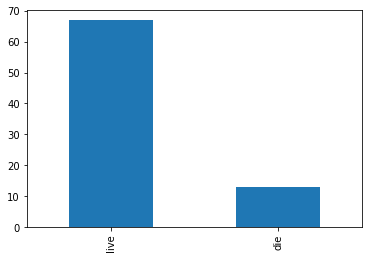

In [136]:
dataset['class'].value_counts().plot(kind='bar')

In [142]:
# males 0 and female 1
dataset['sex'].unique()

array([0, 1], dtype=int64)

In [143]:
dataset['sex'].value_counts()

0    69
1    11
Name: sex, dtype: int64

<AxesSubplot:>

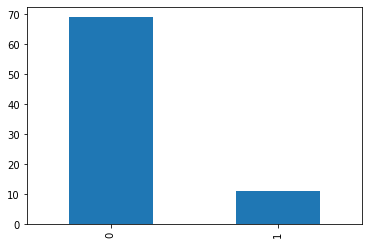

In [144]:
dataset['sex'].value_counts().plot(kind='bar')

In [145]:
dataset.groupby(['age','sex']).size()

age  sex
20   0      1
22   1      1
23   0      1
25   0      1
     1      1
26   1      1
27   0      3
28   0      1
     1      1
30   0      5
31   0      2
32   0      4
33   0      2
34   0      2
     1      2
35   0      1
36   0      3
37   0      1
38   0      7
39   0      3
40   0      3
41   0      1
     1      1
42   0      3
43   0      1
44   0      1
45   0      1
47   0      3
48   0      1
49   0      2
50   0      3
     1      1
51   0      2
52   0      1
53   1      1
54   0      3
56   0      1
57   0      1
58   1      1
59   0      1
61   0      1
62   1      1
64   0      1
65   0      1
72   0      1
dtype: int64

In [146]:
dataset['age'].max()

72

In [148]:
dataset['age'].min()

20

In [152]:
labels=['Less than 10','10-20','20-30','30-40','40-50','50-60','60-70','70 and more']
bins=[0,10,20,30,40,50,60,70,80]

freq_dataset = dataset.groupby(pd.cut(dataset['age'],bins=bins,labels=labels)).size()

In [153]:
freq_dataset

age
Less than 10     0
10-20            1
20-30           15
30-40           30
40-50           18
50-60           11
60-70            4
70 and more      1
dtype: int64

In [155]:
freq_dataset=freq_dataset.reset_index(name='count')

In [156]:
freq_dataset

,age,count
0,Less than 10,0
1,10-20,1
2,20-30,15
3,30-40,30
4,40-50,18
5,50-60,11
6,60-70,4
7,70 and more,1


<AxesSubplot:>

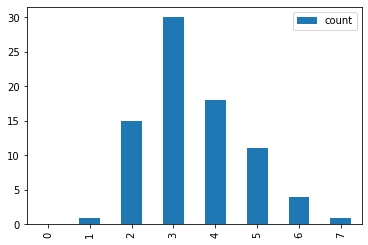

In [157]:
freq_dataset.plot(kind='bar')

<AxesSubplot:>

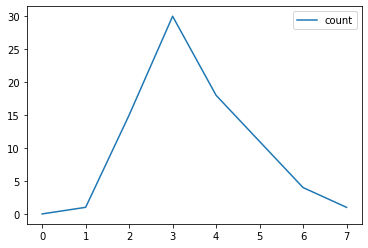

In [158]:
freq_dataset.plot(kind='line')

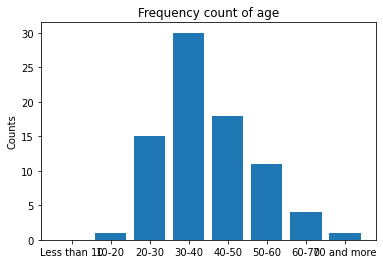

In [164]:
plt.bar(freq_dataset['age'],freq_dataset['count'])
plt.ylabel('Counts')
plt.title('Frequency count of age')
plt.show()

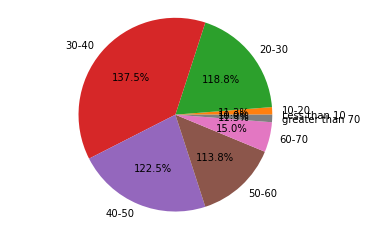

In [166]:
labels=['Less than 10','10-20','20-30','30-40','40-50','50-60','60-70','greater than 70']
fig1,ax1=plt.subplots()
ax1.pie(freq_dataset['count'],labels=labels,autopct='1%.1f%%')
ax1.axis('equal')
plt.show()

In [167]:
import seaborn as sns

F:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

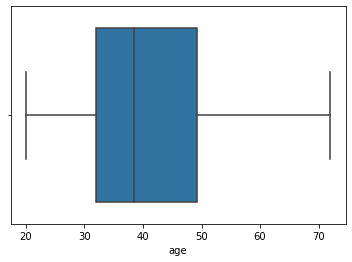

In [168]:
sns.boxplot(dataset['age'])

5      False
10     False
11     False
12     False
13     False
       ...  
139    False
143    False
145    False
153    False
154    False
Name: age, Length: 80, dtype: bool

F:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='steroid'>

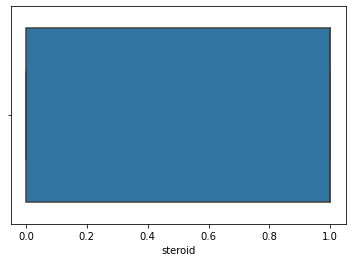

In [170]:
sns.boxplot(dataset['steroid'])

F:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age', ylabel='albumin'>

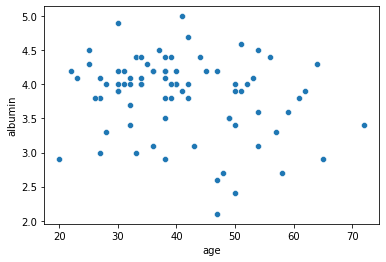

In [171]:
sns.scatterplot(dataset['age'],dataset['albumin'])

<AxesSubplot:xlabel='albumin', ylabel='age'>

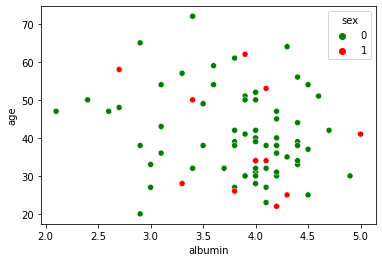

In [176]:
sns.scatterplot(x=dataset['albumin'],y=dataset['age'],hue=dataset['sex'],palette=['green','red'],data=dataset)

In [178]:
q1=dataset.quantile(0.25)
q3=dataset.quantile(0.75)

In [179]:
IQR = q3 - q1

In [180]:
IQR

age              17.25
sex               0.00
antivirals        1.00
bilirubin         0.60
alk_phosphate    65.25
sgot             72.00
albumin           0.70
protime          31.25
histology         1.00
dtype: float64

F:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='alk_phosphate'>

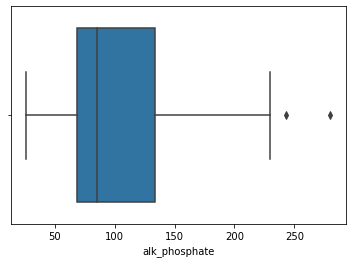

In [181]:
sns.boxplot(dataset['alk_phosphate'])

In [184]:
(dataset < (q1 -1.5 *IQR )) | (dataset > (q3 + 1.5 * IQR))

,age,albumin,alk_phosphate,anorexia,antivirals,ascites,bilirubin,class,fatigue,histology,liver_big,liver_firm,malaise,protime,sex,sgot,spiders,spleen_palpable,steroid,varices
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
10,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
11,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
12,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
13,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
143,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
145,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
153,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False


In [198]:
dataset_no_outlier=dataset[-((dataset < (q1 -1.5 *IQR )) | (dataset > (q3 + 1.5 * IQR))).any(axis=1)]

In [199]:
dataset_no_outlier

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
5,34,0,True,False,False,False,False,True,False,False,False,False,False,0.9,95.0,28.0,4.0,75.0,False,live
10,39,0,False,True,False,False,False,False,True,False,False,False,False,1.3,78.0,30.0,4.4,85.0,False,live
12,41,0,True,True,True,False,False,True,True,False,False,False,False,0.9,81.0,60.0,3.9,52.0,False,live
13,30,0,True,False,True,False,False,True,True,False,False,False,False,2.2,57.0,144.0,4.9,78.0,False,live
15,38,0,False,False,True,True,True,True,False,False,False,True,False,2.0,72.0,89.0,2.9,46.0,False,live
17,40,0,False,False,True,False,False,True,True,False,False,False,False,0.6,62.0,166.0,4.0,63.0,False,live
18,38,0,True,False,False,False,False,True,False,False,False,False,False,0.7,53.0,42.0,4.1,85.0,True,live
19,38,0,False,True,False,False,False,False,True,False,False,False,False,0.7,70.0,28.0,4.2,62.0,False,live
21,27,0,True,False,True,True,True,False,True,True,True,False,False,1.2,133.0,98.0,4.1,39.0,False,live
22,31,0,True,False,False,False,False,True,False,False,False,False,False,1.0,85.0,20.0,4.0,100.0,False,live


In [200]:
print(dataset.shape)
print(dataset_no_outlier.shape)

(80, 20)
(57, 20)


TypeError: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

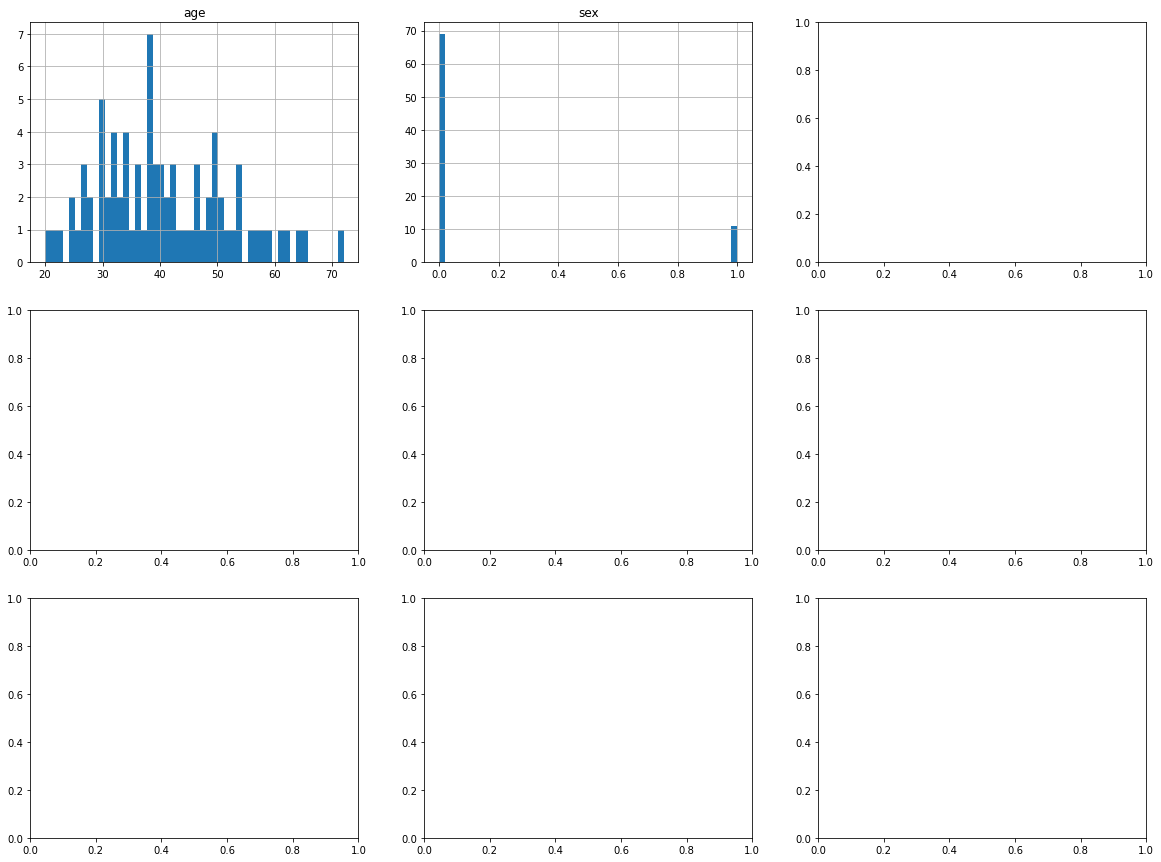

In [203]:
dataset.hist(bins=50,figsize=(20,15))
plt.show()

<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


TypeError: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

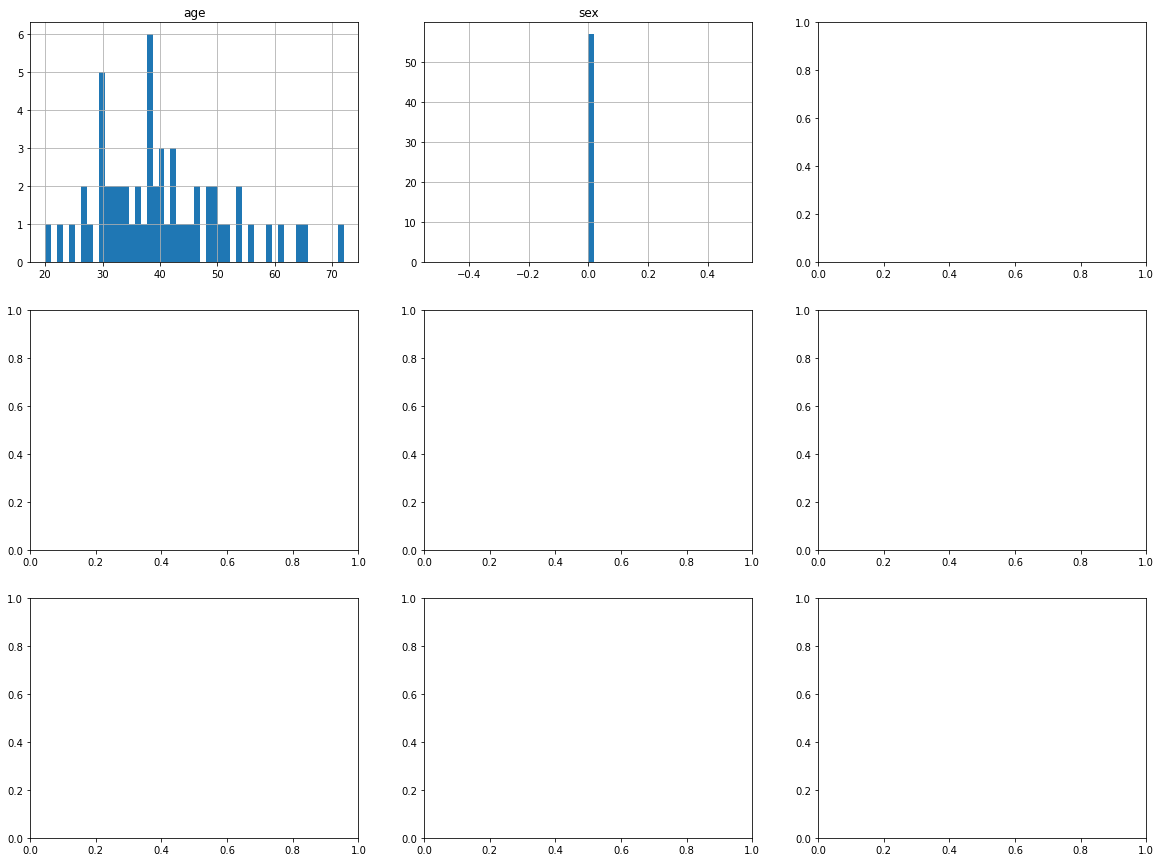

In [239]:
dataset_no_outlier.hist(bins=50,figsize=(20,15))
plt.show()

In [237]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [238]:
dataset.head()

5     live
10    live
11    live
12    live
13    live
Name: class, dtype: object

In [207]:
dataset.columns

Index(['age', 'sex', 'steroid', 'antivirals', 'fatigue', 'malaise', 'anorexia',
       'liver_big', 'liver_firm', 'spleen_palpable', 'spiders', 'ascites',
       'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin', 'protime',
       'histology', 'class'],
      dtype='object')

In [240]:
xfeatures = dataset[['age', 'sex', 'steroid', 'antivirals', 'fatigue', 'malaise', 'anorexia',
       'liver_big', 'liver_firm', 'spleen_palpable', 'spiders', 'ascites',
       'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin', 'protime',
       'histology', 'class']]
ylabels= dataset['class']

KeyError: "None of [Index(['age', 'sex', 'steroid', 'antivirals', 'fatigue', 'malaise', 'anorexia',\n       'liver_big', 'liver_firm', 'spleen_palpable', 'spiders', 'ascites',\n       'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin', 'protime',\n       'histology', 'class'],\n      dtype='object')] are in the [index]"

In [235]:
dataset['class'] = dataset['class'].astype(float)


KeyError: 'class'

In [234]:
skb = SelectKBest(score_func=chi2,k=10)
best_feature_fit = skb.fit(xfeatures,ylabels)

ValueError: could not convert string to float: 'live'

In [219]:
print("Scores",best_feature_fit)

NameError: name 'best_feature_fit' is not defined

In [232]:
bf_02 = best_feature_fit.transform(xfeatures)

NameError: name 'best_feature_fit' is not defined

In [231]:
bf_02

NameError: name 'bf_02' is not defined

In [ ]:
feature_scores

In [ ]:
feature_columns = pd.DataFrame(xfeatures.columns,columns=['Feature_name'])
best_feat_dataset = pd.concat([feature_scores,feature_columns_names])

In [ ]:
best_feat_dataset.nlargest('10','Feature_Scores')

In [241]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [242]:
logit = LogisticRegression()

In [246]:
rfe = RFE(logit,8)

F:\anaconda\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_features_to_select=8 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [247]:
rfe.fit(xfeatures,ylabels)

ValueError: could not convert string to float: 'live'

In [248]:
selected_features = pd.DataFrame(rfe_fit.support_,columns=["Selevted_Features"])
ranking_features = pd.DataFrame(rfe_fit.ranking_,columns=["Selected_Features"])


NameError: name 'rfe_fit' is not defined

In [ ]:
rfe_feature_dataset = pd.concat([selected_features,ranking_features],axis=1)

In [ ]:
rfe_feature_df

In [249]:
from sklearn.ensemble import ExtraTreesClassifier

In [250]:
et_clf = ExtraTreesClassifier()
et_clf.fit(xfeatures,ylabels)

ValueError: could not convert string to float: 'live'

In [ ]:
feature_imporance_dataset = pd.Series(et_clf.feature_importance_,index=xfeatures.columns)

In [ ]:
feature_imporance_dataset.nlargest(10).plot(kind='barh')

In [ ]:
sns.heatmap(xfeature.corr())

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(xfeatures.corr(),annot=True)
plt.show()